## Assignment 10

In this assignment, you will get an on-hand experience of utilizing PCA as a dimensionality reduction tool to extract features. 

Specifically,

1. Load the digits data from sklearn.

2. Perform a PCA on the dataset **without** specifying `n_components` and which direction is the main principal component? Namely, along the direction, the variance of sample points is the largest.

3. Compute the cumulative variance ratio of all the components. If we request that the PCA method should preserve at least 50% of the total variance, what is the minimum number of principal components?

4. Choose the best number ($N$) of components by cross-validation. In order to achieve it,first you need to apply the PCA with different $N$ to transform the image data. Then, you are required to apply the logistic regression to do the classification with transformed data as $X$ and the corresponding labels as $Y$. Finally, you can do the cross validation for each $N$.

  For Q4 in the assignment10, the requirement is not quite clear, so I update the corresponding file. Q4 is a classification problem so you need to apply the logistic regression rather than the linear regression. First you need to apply the PCA with different N to transform the image data. Then, you are required to apply the logistic regression to do the classification with transformed data as X and the corresponding labels as Y. Finally, you can do the cross validation for each N.

 

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [12]:
digits = load_digits()
pca = PCA(n_components=None)  # project from 64 to 2 dimensions
data = digits.data
target = digits.target
projected = pca.fit_transform(scale(digits.data))
print("original shape:   ", digits.data.shape)
print("transformed shape:", projected.shape)

original shape:    (1797, 64)
transformed shape: (1797, 64)


In [5]:
print('Direction of the main principal component:')
print(pca.components_)

Direction of the main principal component:
[[-1.77484909e-19 -1.73094651e-02 -2.23428835e-01 ... -8.94184677e-02
  -3.65977111e-02 -1.14684954e-02]
 [ 3.27805401e-18 -1.01064569e-02 -4.90849204e-02 ...  1.76697117e-01
   1.94547053e-02 -6.69693895e-03]
 [-1.68358559e-18  1.83420720e-02  1.26475543e-01 ...  2.32084163e-01
   1.67026563e-01  3.48043832e-02]
 ...
 [ 0.00000000e+00 -6.79747203e-17  1.64431900e-16 ...  1.66533454e-16
   0.00000000e+00 -2.15105711e-16]
 [-0.00000000e+00 -3.63110656e-16  4.09445032e-17 ... -0.00000000e+00
  -5.55111512e-17 -2.28983499e-16]
 [ 1.00000000e+00 -1.68983002e-17  5.73338351e-18 ...  8.66631300e-18
  -1.57615962e-17  4.07058917e-18]]


In [ ]:
which direction is the main principal component? Namely, along the direction, the variance of sample points is the largest.

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496353,
       0.59413263, 0.6372925 , 0.67390623, 0.70743871, 0.73822677,
       0.76195018, 0.78467714, 0.80289578, 0.82063433, 0.83530534,
       0.84940249, 0.86258838, 0.87506976, 0.88524694, 0.89430312,
       0.9031985 , 0.91116973, 0.91884467, 0.9260737 , 0.93303259,
       0.9389934 , 0.94474955, 0.94990113, 0.95479652, 0.9590854 ,
       0.96282146, 0.96635421, 0.96972105, 0.97300135, 0.97608455,
       0.97902234, 0.98158823, 0.98386565, 0.98608843, 0.98820273,
       0.99010182, 0.99168835, 0.99319995, 0.99460574, 0.99577196,
       0.99684689, 0.99781094, 0.99858557, 0.99914278, 0.99954711,
       0.99975703, 0.99983951, 0.99989203, 0.99994255, 0.99997555,
       0.99998798, 0.99999503, 0.99999804, 0.99999911, 0.99999966,
       1.        , 1.        , 1.        , 1.        ])

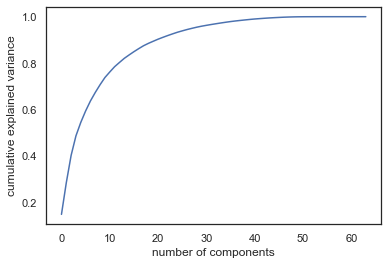

In [25]:
#3
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
np.cumsum(pca.explained_variance_ratio_)

In [28]:
print("the minimum number of principal components is 5")

the minimum number of principal components is 5


Text(0, 0.5, 'MSE')

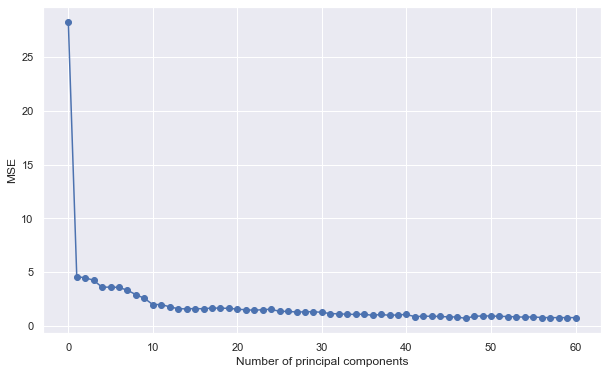

In [28]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
sns.set()


pca = PCA()
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=1)

# Scale the data
projected_train = pca.fit_transform(scale(X_train))
mse = []

# 10-fold cv
score = -cross_val_score(regr, 
                         np.ones((len(projected_train), 1)), y_train,
                         cv=10, scoring='neg_mean_squared_error')
mse.append(score.mean())

# Calculate MSE using cv for the 64 components, adding one at a time
for i in range(1, n+1):
    score = -cross_val_score(regr, projected_train[:, :i], y_train, cv=10, scoring='neg_mean_squared_error')
    mse.append(score.mean())

# Plot results
plt.figure(figsize=(10,6))
plt.plot(mse, marker='o')
plt.xlabel('Number of principal components')
plt.ylabel('MSE')

Text(0, 0.5, 'MSE')

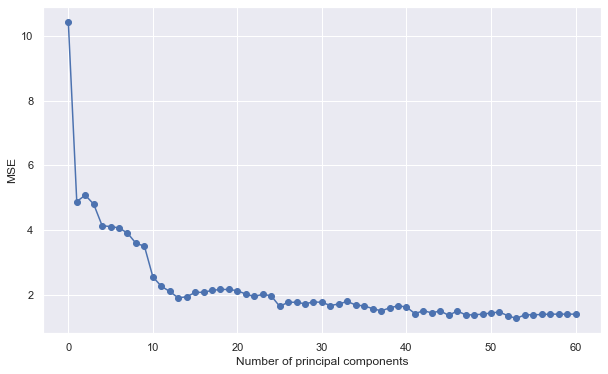

In [29]:


n = digits.data.shape[1]
regr = LogisticRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -cross_val_score(regr, np.ones((len(projected), 1)), target, cv=10, scoring='neg_mean_squared_error')
mse.append(score.mean())

# Calculate MSE using CV for the 64 principle components, adding one component at a time
for i in range(5, n+1):
    score = -cross_val_score(regr, projected[:, :i], target, cv=10, scoring='neg_mean_squared_error')
    mse.append(score.mean())
    
# Plot results
plt.figure(figsize=(10,6))
plt.plot(mse, marker='o')
plt.xlabel('Number of principal components')
plt.ylabel('MSE')

In [30]:
for i in range(5, 64):
    X_reduced_test = pca.transform(scale(X_test))[:, :i]

    # Train regression model on training data
    regr.fit(projected_train[:, :i], y_train)

    # Predict with test data
    pred = regr. predict(X_reduced_test)
    print(i,mean_squared_error(y_test, pred))

5 5.027777777777778
6 4.783333333333333
7 4.561111111111111
8 3.816666666666667
9 3.438888888888889
10 3.772222222222222
11 2.8555555555555556
12 2.7555555555555555
13 2.5388888888888888
14 1.7555555555555555
15 1.55
16 1.4444444444444444
17 1.4444444444444444
18 1.6222222222222222
19 2.1666666666666665
20 1.8944444444444444
21 1.711111111111111
22 1.2666666666666666
23 1.511111111111111
24 1.3166666666666667
25 0.9944444444444445
26 1.0
27 1.0
28 0.9944444444444445
29 0.9388888888888889
30 0.9388888888888889
31 0.9388888888888889
32 0.5833333333333334
33 0.5833333333333334
34 0.5833333333333334
35 0.5833333333333334
36 0.5166666666666667
37 0.5166666666666667
38 0.5166666666666667
39 0.5166666666666667
40 0.49444444444444446
41 0.49444444444444446
42 0.49444444444444446
43 0.49444444444444446
44 0.40555555555555556
45 0.49444444444444446
46 0.49444444444444446
47 0.49444444444444446
48 0.49444444444444446
49 0.49444444444444446
50 0.49444444444444446
51 0.7666666666666667
52 0.4111111

In [31]:
print("as we can see a great reduce in 53,the best N is 53 ")

as we can see a great reduce in 53,the best N is 53 
